In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
from PIL import Image
import cv2

In [2]:
!ls ../data/

train.tar.gz valid.tar.gz


In [3]:
DATA_DIR = '../data'

In [9]:
# Get full image path by adding filename to base path

# Get the paths
train_paths = np.array([i.split('.')[0] for i in glob.glob(f'{DATA_DIR}/mycetoma_train/**/*.jpg')])
val_paths = np.array([i.split('.')[0] for i in glob.glob(f'{DATA_DIR}/mycetoma_valid/**/*.jpg')])

print(f"Train length: {len(train_paths)}")
print(f"Val length: {len(val_paths)}")

Train length: 592
Val length: 91


In [23]:
# Try opening an image and corresponding mask

idx = 107

print(f"Image path: {train_paths[idx]}.jpg")

image_path = f"{train_paths[idx]}.jpg"
mask_path = f"{train_paths[idx]}_mask.tif"

# Load the image and mask
img = np.asarray(Image.open(image_path))
mask = np.asarray(Image.open(mask_path))

Image path: data/mycetoma_train/BM/BM23_6.jpg


In [24]:
img.shape

(600, 800, 3)

In [25]:
mask.shape

(600, 800)

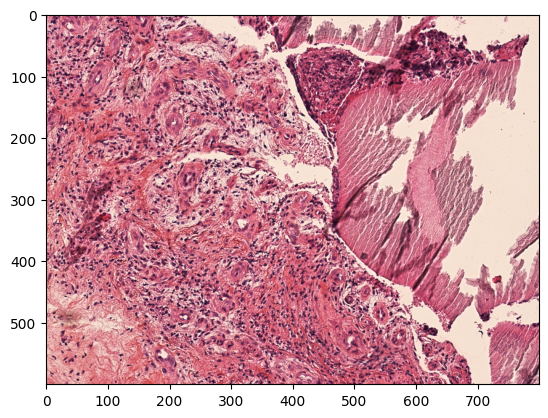

In [26]:
plt.imshow(img)
plt.show()

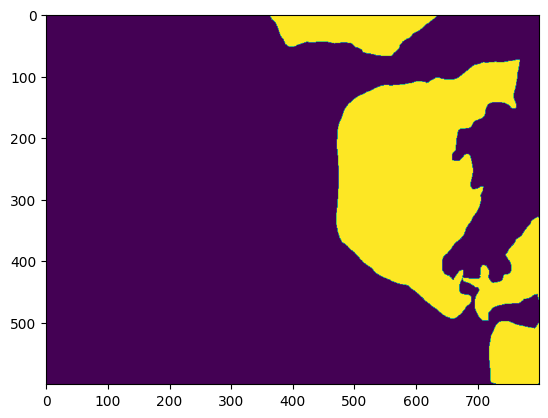

In [27]:
plt.imshow(mask)

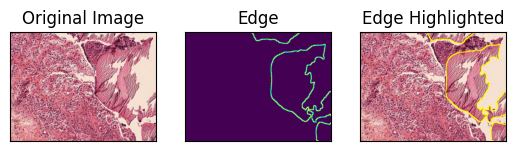

In [28]:
edges = cv2.Canny(mask,0,1)   # canny edge detector

edges = cv2.dilate(edges, np.ones((5, 5)))

img2 = img.copy()
img2[edges == 255] = [255, 255, 0]  # turn edges to yellow

plt.subplot(131),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edges)
plt.title('Edge'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img2)
plt.title('Edge Highlighted'), plt.xticks([]), plt.yticks([])

plt.show()

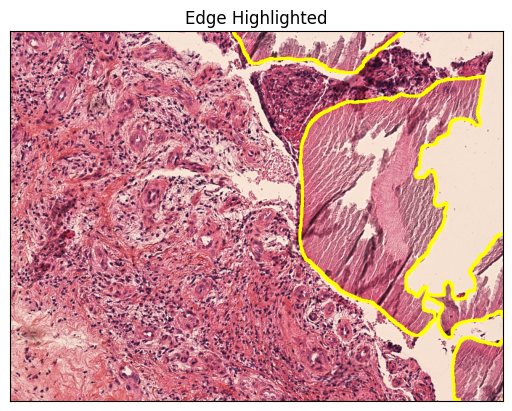

In [29]:
plt.imshow(img2)
plt.title('Edge Highlighted'), plt.xticks([]), plt.yticks([])
plt.show()

In [30]:
np.max(img.flatten())

255

In [31]:
def clip_and_norm(image, upper_bound):
    # Clip intensity values
    image = np.clip(image, 0, upper_bound)

    # Normalize the image to the range [0, 1]
    norm = (image - 0) / (upper_bound - 0)

    return norm

In [32]:
norm_im = clip_and_norm(img, 255)

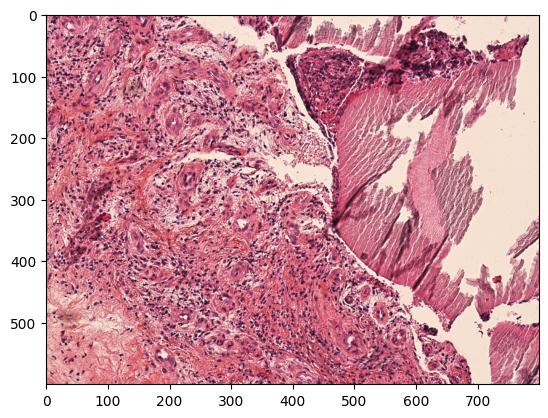

In [33]:
plt.imshow(norm_im)
plt.show()

In [34]:
!ls src/

datasets.py  metrics.py  model_2DUNet.py  model_SAM.py	model_UNet.py  __pycache__  utils.py


In [ ]:
# Try opening two image and corresponding mask

path = 'BM37_3'

print(f"Image path: {train_paths[idx]}.jpg")

image_path = f"{train_paths[idx]}.jpg"
mask_path = f"{train_paths[idx]}_mask.tif"

# Load the image and mask
img = np.asarray(Image.open(image_path))
mask = np.asarray(Image.open(mask_path))

In [13]:
for i, path in enumerate(train_paths):
  if 'BM37' in path:
    print(f'{i}: {path}')

79: data/mycetoma_train/BM/BM37_2
131: data/mycetoma_train/BM/BM37_6
166: data/mycetoma_train/BM/BM37_5
178: data/mycetoma_train/BM/BM37_3
181: data/mycetoma_train/BM/BM37_1
199: data/mycetoma_train/BM/BM37_4


In [14]:
# Try opening an image and corresponding mask

idx = 178

print(f"Image path: {train_paths[idx]}.jpg")

image_path = f"{train_paths[idx]}.jpg"
mask_path = f"{train_paths[idx]}_mask.tif"

# Load the image and mask
img1 = np.asarray(Image.open(image_path))
mask1 = np.asarray(Image.open(mask_path))

Image path: data/mycetoma_train/BM/BM37_3.jpg


In [15]:
# Try opening an image and corresponding mask

idx = 199

print(f"Image path: {train_paths[idx]}.jpg")

image_path = f"{train_paths[idx]}.jpg"
mask_path = f"{train_paths[idx]}_mask.tif"

# Load the image and mask
img2 = np.asarray(Image.open(image_path))
mask2 = np.asarray(Image.open(mask_path))

Image path: data/mycetoma_train/BM/BM37_4.jpg


In [19]:
(img1==img2).all()

True

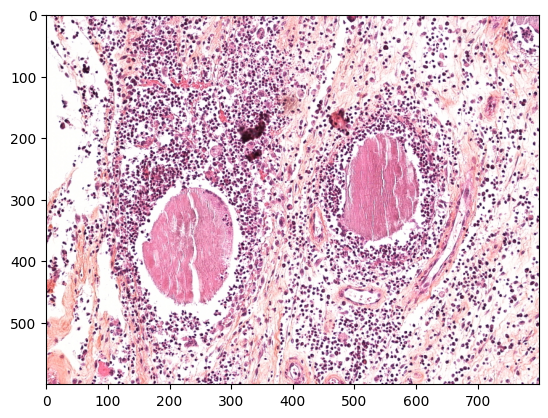

In [16]:
plt.imshow(img1)
plt.show()

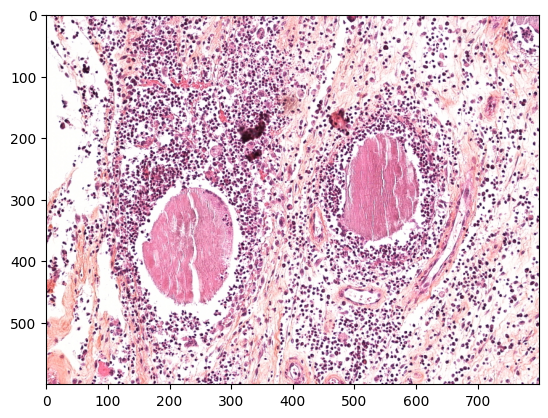

In [17]:
plt.imshow(img2)
plt.show()

In [20]:
new_mask = mask1+mask2

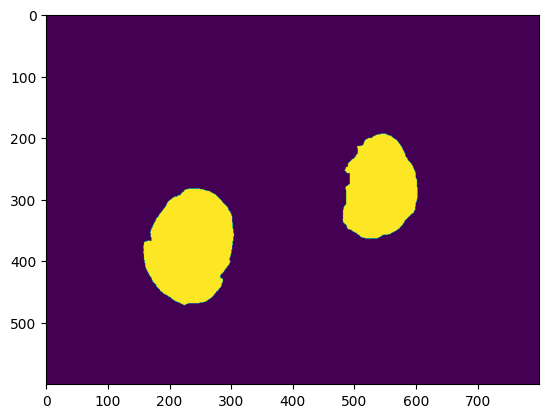

In [21]:
plt.imshow(new_mask)